In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Q1 Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
data=pd.read_csv("C:\\Users\\SAGAR\\Downloads\\Salarydata.csv")

In [6]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Correlation

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


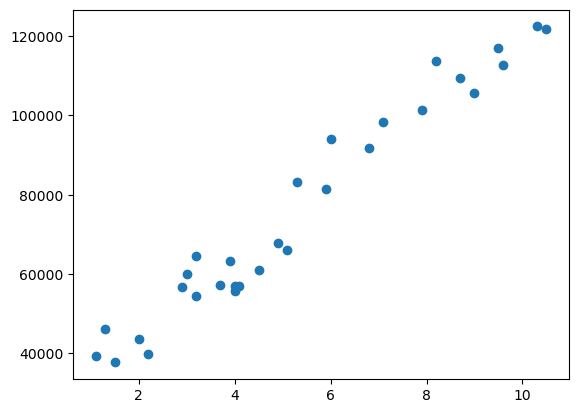

In [4]:
plt.scatter(data['YearsExperience'],data['Salary'])

C:\Users\SAGAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

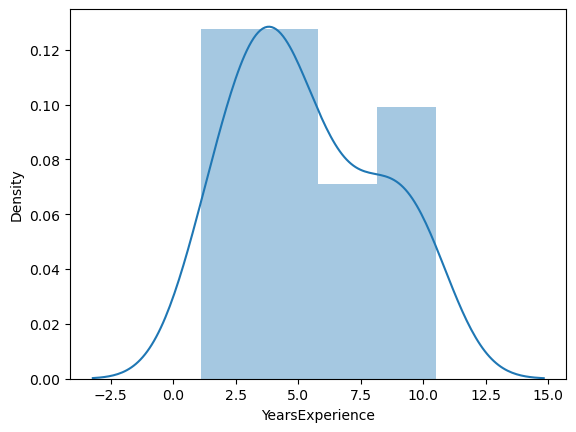

In [5]:
sns.distplot(data['YearsExperience'])

C:\Users\SAGAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

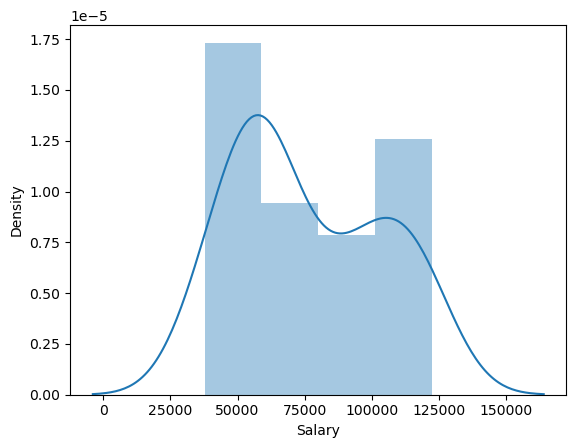

In [6]:
sns.distplot(data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

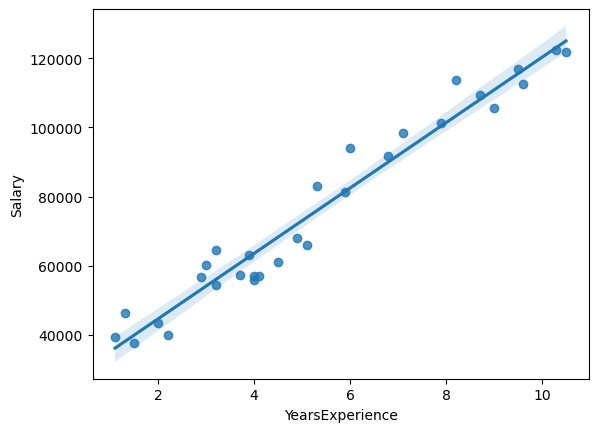

In [7]:
sns.regplot(x= "YearsExperience",y= "Salary",data=data)

Fitting a Linear Regression Model

In [12]:
import statsmodels.formula.api as smf
model1 = smf.ols("Salary~YearsExperience",data=data).fit()

In [13]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
print(model1.tvalues, '\n',model1.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [17]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        14:26:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2= smf.ols("np.log(Salary)~np.log(YearsExperience)",data=data).fit()

In [20]:
print(model2.params,'\n''\n', model2.pvalues)

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64 

 Intercept                  9.073132e-45
np.log(YearsExperience)    7.395278e-16
dtype: float64


In [21]:
(model2.rsquared,model2.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        14:26:36   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model3= smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [24]:
print(model3.params,'\n''\n', model3.tvalues,'\n''\n', model3.pvalues)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [25]:
(model3.rsquared,model3.rsquared_adj)

(0.853888882875697, 0.8486706286926862)

In [26]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        14:27:05   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model4= smf.ols("Salary~np.sqrt(YearsExperience)",data=data).fit()

In [28]:
print(model4.params,'\n''\n', model4.tvalues,'\n''\n', model4.pvalues)

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64 

 Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 

 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [29]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        14:27:30   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
data1=model1.predict(data)
data1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [32]:
data=pd.concat([data,data1],axis=1)
data

,YearsExperience,Salary,0
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788


From all above 1st model is suitable